In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df = pd.read_excel('ENB2012_data.xlsx')
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
'X6': 'Orientation', 'X7': 'Glazing_Area',
'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

df = df.rename(columns=column_names)
df1 = df.dropna(axis=1)
df1.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

<AxesSubplot:xlabel='Relative_Compactness', ylabel='Cooling_Load'>

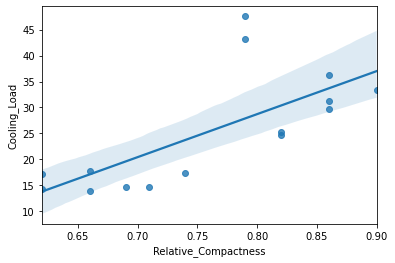

In [45]:
#select a sample of the dataset
simple_linear_reg_df = df1[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)

#regression plot
sns.regplot(x="Relative_Compactness", y="Cooling_Load", data=simple_linear_reg_df)

In [46]:
# CHECKING ACCURACY OF THE MODEL

#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']


#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=0.3, random_state=1)

linear_model = LinearRegression()

#fit the model to the training dataset
linear_model.fit(x_train, y_train)


#obtain predictions
predicted_values = linear_model.predict(x_test)


In [47]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.063

In [48]:
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

1.817

In [49]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.089

In [50]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.894

In [51]:
# PENALISATION

#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [52]:
#Feature Selection and Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [53]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
    
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df


linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Relative_Compactness,-0.606412,-0.283471,-0.027719
1,Roof_Area,-0.328099,-0.163192,-0.000000
2,Surface_Area,-0.235022,-0.062275,0.000000
3,Orientation,0.003399,0.003369,0.000000
4,Wall_Area,0.018947,0.103061,0.200087
5,Glazing_Area_Distribution,0.028452,0.029088,0.021431
6,Glazing_Area,0.215042,0.212449,0.206132
7,Overall_Height,0.393549,0.442467,0.463482


In [54]:
#  Appliances Energy Prediction data. (Quiz Data)

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
qdat = pd.read_csv('energydata_complete.csv')
qcol_names = {'T1': 'Temperature in kitchen area','RH_1': 'Humidity in kitchen area','T2': 'Temperature in living room area',
    'RH_2': 'Humidity in living room area','T3': 'Temperature in laundry room area','RH_3': 'Humidity in laundry room area',
    'T4': 'Temperature in office room','RH_4': 'Humidity in office room','T5': 'Temperature in bathroom',
    'RH_5': 'Humidity in bathroom','T6': 'Temperature outside the building (north side)',
    'RH_6': 'Humidity outside the building (north side)','T7': 'Temperature in ironing room','RH_7': 'Humidity in ironing room',
    'T8': 'Temperature in teenager room 2','RH_8': 'Humidity in teenager room 2','T9': 'Temperature in parents room',
    'RH_9': 'Humidity in parents room','T_out': 'Temperature outside (from Chievres weather station)',
    'RH_out': 'Humidity outside (from Chievres weather station)','rv1': 'Random variable 1','rv2': 'Random variable 2',}

qdat = qdat.rename(columns = qcol_names)
qdat = qdat.drop(columns = ['date', 'lights'])

In [86]:
qdat

,Appliances,Temperature in kitchen area,Humidity in kitchen area,Temperature in living room area,Humidity in living room area,Temperature in laundry room area,Humidity in laundry room area,Temperature in office room,Humidity in office room,Temperature in bathroom,...,Temperature in parents room,Humidity in parents room,Temperature outside (from Chievres weather station),Press_mm_hg,Humidity outside (from Chievres weather station),Windspeed,Visibility,Tdewpoint,Random variable 1,Random variable 2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [62]:
# CHECKING ACCURACY OF THE MODEL for QDAT

#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_qdat = pd.DataFrame(scaler.fit_transform(qdat), columns=qdat.columns)
features_qdat = normalised_qdat[['Temperature in living room area']]
heating_target = normalised_qdat['Temperature outside the building (north side)']


#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(features_qdat, heating_target, test_size=0.3, random_state=42)
model_qdat = LinearRegression()

#fit the model to the training dataset
model_qdat.fit(x_train, y_train)


#obtain predictions
predicted_values = model_qdat.predict(x_test)


In [64]:
# r^2
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

0.64

In [65]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.082

In [66]:
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

66.116

In [67]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.106

In [68]:
model_qdat.coef_.round(2)

array([0.89])

In [71]:
# PENALISATION

#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)
ridge_pred = ridge_reg.predict(x_test)

In [72]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
round(rmse, 3)

0.106

In [83]:
#Feature Selection and Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)
lasso_pred = lasso_reg.predict(x_test)

In [84]:
rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
round(rmse, 3)

0.106

In [85]:
lasso_reg.coef_.tolist()

[0.8517799108245595]